## Display simulated data

In [1]:
import numpy as np
import scipy
import imageio

In [132]:
def create_seq(matlab_arr, py_arr, name):
    # Matlab
    image_sequence = np.array(matlab_arr)
    image_sequence = (image_sequence - np.min(image_sequence)) / (np.max(image_sequence) - np.min(image_sequence)) * 255
    image_sequence = image_sequence.astype(np.uint8)

    # Create the GIF
    gif_filename = f'{name}_matlab.gif'
    with imageio.get_writer(gif_filename, mode='I', duration=0.1, loop=0) as writer:
        for i in range(image_sequence.shape[2]):
            writer.append_data(image_sequence[:, :, i])

    # Python
    image_sequence = np.array(py_arr)
    image_sequence = (image_sequence - np.min(image_sequence)) / (np.max(image_sequence) - np.min(image_sequence)) * 255
    image_sequence = image_sequence.astype(np.uint8)

    # Create the GIF
    gif_filename = f'{name}_py.gif'
    with imageio.get_writer(gif_filename, mode='I', duration=0.1, loop=0) as writer:
        for i in range(image_sequence.shape[2]):
            writer.append_data(image_sequence[:, :, i])

In [163]:
simImg_py = scipy.io.loadmat('./BC07/cart_images.mat', squeeze_me=True)['simImg']
smap_py = scipy.io.loadmat('./BC07/coil_sens.mat', squeeze_me=True)['smap']

simImg_matlab = scipy.io.loadmat('./archive/BC07/cart_images.mat', squeeze_me=True)['simImg']
smap_matlab = scipy.io.loadmat('./archive/BC07/coil_sens.mat', squeeze_me=True)['smap']

In [164]:
print(simImg_matlab.shape)
print(smap_matlab.shape)

(320, 320, 22)
(320, 320, 16)


In [165]:
create_seq(simImg_matlab, simImg_py, 'simImg')

In [136]:
from IPython.display import HTML

# Display the GIFs side by side
html_content = """
<div style="display:flex">
    <div style="flex:1;margin-right:5px;">
        <img src="simImg_matlab.gif" width="300">
        <p>Simulation 1: Matlab</p>
    </div>
    <div style="flex:1;margin-left:5px;">
        <img src="simImg_py.gif" width="300">
        <p>Simulation 2: Python</p>
    </div>
</div>
"""

HTML(html_content)

## Compare simulation variables

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [130]:
parMap_matlab = scipy.io.loadmat('./archive/BC02/parMap.mat', squeeze_me=True)['parMap']
parMap_py = np.load('parMap.npy')

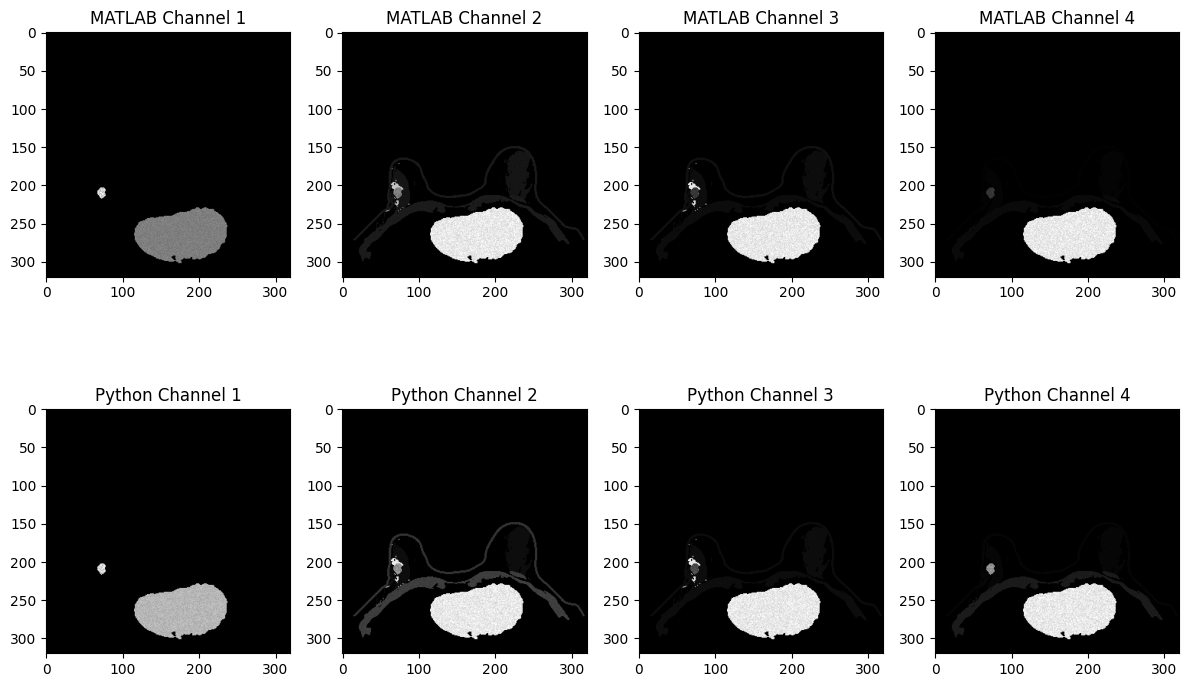

In [131]:
# Create a new figure with two rows and four columns
plt.figure(figsize=(12, 8))

# First row: MATLAB channels
plt.subplot(2, 4, 1)
plt.imshow(parMap_matlab[:,:,0], cmap='gray')
plt.title('MATLAB Channel 1')

plt.subplot(2, 4, 2)
plt.imshow(parMap_matlab[:,:,1], cmap='gray')
plt.title('MATLAB Channel 2')

plt.subplot(2, 4, 3)
plt.imshow(parMap_matlab[:,:,2], cmap='gray')
plt.title('MATLAB Channel 3')

plt.subplot(2, 4, 4)
plt.imshow(parMap_matlab[:,:,3], cmap='gray')
plt.title('MATLAB Channel 4')

# Second row: Python channels
plt.subplot(2, 4, 5)
plt.imshow(parMap_py[:,:,0], cmap='gray')
plt.title('Python Channel 1')

plt.subplot(2, 4, 6)
plt.imshow(parMap_py[:,:,1], cmap='gray')
plt.title('Python Channel 2')

plt.subplot(2, 4, 7)
plt.imshow(parMap_py[:,:,2], cmap='gray')
plt.title('Python Channel 3')

plt.subplot(2, 4, 8)
plt.imshow(parMap_py[:,:,3], cmap='gray')
plt.title('Python Channel 4')

plt.tight_layout()
plt.show()

In [156]:
plt.imsave('nya.png', simImg_matlab[:,:, 20])

In [140]:
cts_matlab = scipy.io.loadmat('./archive/BC02/cts.mat', squeeze_me=True)['cts']
cts_py = np.load('cts.npy')

In [143]:
img = cts_matlab[:,:,20]

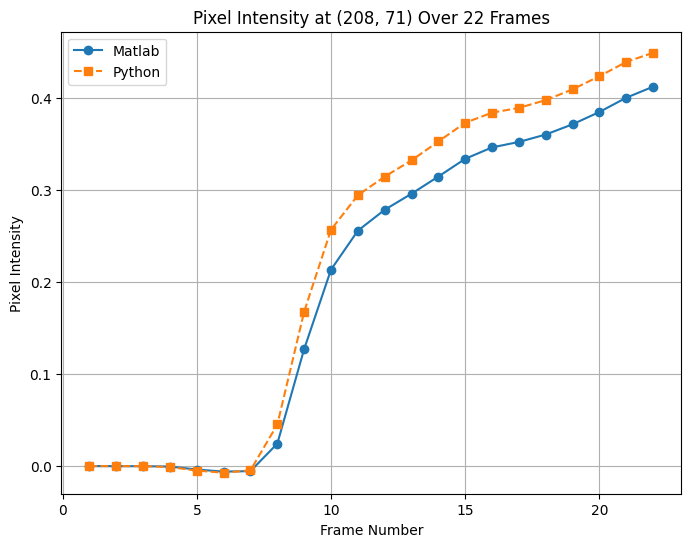

In [157]:
x, y = 208, 71  # Example pixel coordinates

# Extract intensity values for the pixel from the first image
pixel_intensity1 = cts_matlab[x, y, :]
# Extract intensity values for the pixel from the second image
pixel_intensity2 = cts_py[x, y, :]

# Plotting both pixel intensity curves on the same figure
plt.figure(figsize=(8, 6))
plt.plot(range(1, 23), pixel_intensity1, label='Matlab', marker='o', linestyle='-')
plt.plot(range(1, 23), pixel_intensity2, label='Python', marker='s', linestyle='--')

plt.title(f'Pixel Intensity at ({x}, {y}) Over 22 Frames')
plt.xlabel('Frame Number')
plt.ylabel('Pixel Intensity')
plt.grid(True)
plt.legend()  # Show legend to distinguish between the two images
plt.show()

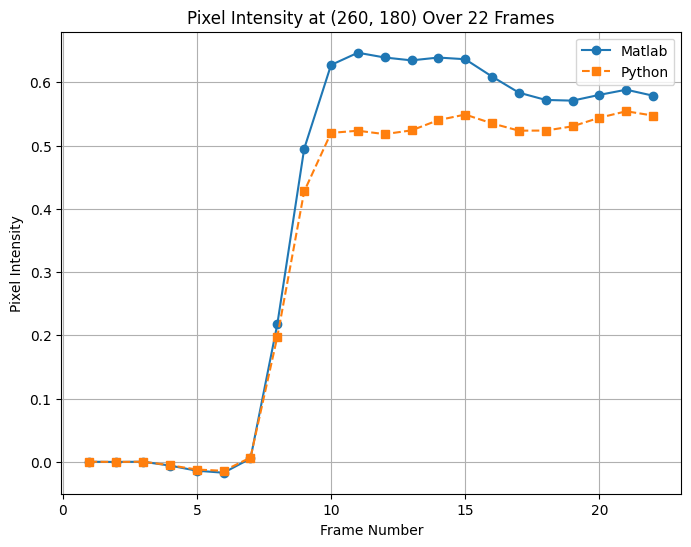

In [162]:
x, y = 260, 180  # Example pixel coordinates

# Extract intensity values for the pixel from the first image
pixel_intensity1 = cts_matlab[x, y, :]
# Extract intensity values for the pixel from the second image
pixel_intensity2 = cts_py[x, y, :]

# Plotting both pixel intensity curves on the same figure
plt.figure(figsize=(8, 6))
plt.plot(range(1, 23), pixel_intensity1, label='Matlab', marker='o', linestyle='-')
plt.plot(range(1, 23), pixel_intensity2, label='Python', marker='s', linestyle='--')

plt.title(f'Pixel Intensity at ({x}, {y}) Over 22 Frames')
plt.xlabel('Frame Number')
plt.ylabel('Pixel Intensity')
plt.grid(True)
plt.legend()  # Show legend to distinguish between the two images
plt.show()